# Using Historical Data to Predict Batting Success: Step 3 - Hall Of Fame Modelling

Authored by: Donna J. Harris (994042890)

Email: harr2890@mylaurier.ca

For: CP640 Machine Learning (S22) with Professor Elham Harirpoush

## Notebook Series

Just a word about the presentation of this project code.

The code is organized into a series of locally executed Jupyter notebooks, organized by step and needing to be executed in sequence. This is `harr2890_project_step3_hof_modelling`, the third of XXXXX notebooks.  TODO

## *Step 3 - Exploration and Modelling for a Hall of Fame Approach*

word words word TODO


## Environment Setup

Import and establish environment for our work, including showing all dataframe column values.

In [9]:
import pandas as pd

pd.set_option('display.max_columns', None)

### Pre-Conditions

Steps 1-2 must be run completely before running this notebook.

The `data` folder must exist with the following prepared data files:
- `mlb_data..... TODO filename`
- `hof data..... TODO filename`

##  Loading Prepared Data Files

In [10]:
alldata_csv = "./data/step2_alldata.csv"
alldata = pd.read_csv(alldata_csv)
alldata

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee
0,aaronha01,Henry Aaron,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,0.305503,0.555152,0.374276,0.929429,1
1,abreubo01,Bobby Abreu,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85,0.291274,0.474764,0.394977,0.869741,0
2,adairje01,Jerry Adair,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,0.254292,0.346852,0.291598,0.638451,0
3,adamsbo03,Bobby Adams,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,0.269371,0.368695,0.339357,0.708052,0
4,adamsma01,Matt Adams,10,2614,2421,297,624,130,6,118,399,165,643,12,0,16,0.257745,0.462619,0.306427,0.769046,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,zernigu01,Gus Zernial,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,0.266244,0.488325,0.332186,0.820511,0
1815,zimmedo01,Don Zimmer,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14,0.235550,0.371970,0.290508,0.662478,0
1816,zimmery01,Ryan Zimmerman,16,7402,6654,963,1846,417,22,284,1061,646,1384,31,1,69,0.277427,0.474752,0.340946,0.815698,0
1817,ziskri01,Richie Zisk,13,5737,5144,681,1477,245,26,207,792,533,910,12,7,41,0.287131,0.465591,0.352880,0.818471,0


In [11]:
pre_2000_csv = "./data/step2_pre_2000.csv"
pre_2000 = pd.read_csv(pre_2000_csv)
pre_2000

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee
0,aaronha01,Henry Aaron,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,0.305503,0.555152,0.374276,0.929429,1
1,abreubo01,Bobby Abreu,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85,0.291274,0.474764,0.394977,0.869741,0
2,adairje01,Jerry Adair,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,0.254292,0.346852,0.291598,0.638451,0
3,adamsbo03,Bobby Adams,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,0.269371,0.368695,0.339357,0.708052,0
4,adamssp01,Sparky Adams,13,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,0.285714,0.353005,0.342606,0.695611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,zaungr01,Gregg Zaun,16,4042,3489,431,878,194,9,88,446,479,544,29,14,31,0.251648,0.388077,0.344091,0.732168,0
1510,zeileto01,Todd Zeile,16,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,0.264624,0.423346,0.346140,0.769487,0
1511,zernigu01,Gus Zernial,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,0.266244,0.488325,0.332186,0.820511,0
1512,zimmedo01,Don Zimmer,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14,0.235550,0.371970,0.290508,0.662478,0


In [12]:
from_2000_csv = "./data/step2_from_2000.csv"
from_2000 = pd.read_csv(from_2000_csv)
from_2000

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee
0,adamsma01,Matt Adams,10,2614,2421,297,624,130,6,118,399,165,643,12,0,16,0.257745,0.462619,0.306427,0.769046,0
1,alonsyo01,Yonder Alonso,10,3773,3362,390,872,181,2,100,426,366,648,16,1,28,0.259369,0.403629,0.332450,0.736078,0
2,altuvjo01,Jose Altuve,11,6346,5778,883,1777,340,29,164,639,443,753,54,26,45,0.307546,0.461578,0.359810,0.821389,0
3,andinro01,Robert Andino,10,1491,1344,153,313,58,1,18,97,113,313,6,21,7,0.232887,0.317708,0.293878,0.611586,0
4,andruel01,Elvis Andrus,13,7620,6863,953,1864,328,50,79,673,547,1043,50,103,56,0.271601,0.368498,0.327435,0.695933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,youngde03,Delmon Young,10,4371,4108,473,1162,218,11,109,566,179,784,40,1,43,0.282863,0.420886,0.316018,0.736904,0
301,younger03,Eric Young Jr.,10,1926,1725,253,422,67,22,13,112,147,350,23,26,5,0.244638,0.331594,0.311579,0.643173,0
302,youngmi02,Michael Young,14,8612,7918,1136,2375,441,60,185,1030,575,1235,22,25,72,0.299949,0.440894,0.346105,0.786999,0
303,zimmery01,Ryan Zimmerman,16,7402,6654,963,1846,417,22,284,1061,646,1384,31,1,69,0.277427,0.474752,0.340946,0.815698,0


For later, we want the names of players in the `from_2000` data.

In [13]:
from_2000_names = from_2000['Player']
from_2000_names

0          Matt Adams
1       Yonder Alonso
2         Jose Altuve
3       Robert Andino
4        Elvis Andrus
            ...      
300      Delmon Young
301    Eric Young Jr.
302     Michael Young
303    Ryan Zimmerman
304       Ben Zobrist
Name: Player, Length: 305, dtype: object

Also for later on, this function to print out the predicted names from the `from_2000` data.

In [14]:
def print_hall_of_fame_predictions(y_predictions):
    predictions = []
    i = 0
    for pred in y_predictions:
        if pred == 1:
            predictions.append(i)
        i += 1
        
    if len(predictions) == 0:
        print("Empty player list.")
    else:
        for player in predictions:
            print(from_2000_names[player])

## Extract X and y Data from `pre_2000`

`pre_2000` has 1514 records, which will be split into training and testing data later.

`pre_2000` has 21 columns, the first two (`ID` and `Player`) are for identification purposes and last column (`Inductee`) is our label. This leaves 18 feature columns for consideration. Also, note that four of the columns (the calculated statistics) are based on other features in the data.

We can extract those 18 feature columns into `X`:

In [15]:
num = pre_2000.shape[1]
X = pre_2000[pre_2000.columns[2:num-1]]
X

,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS
0,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,0.305503,0.555152,0.374276,0.929429
1,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85,0.291274,0.474764,0.394977,0.869741
2,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,0.254292,0.346852,0.291598,0.638451
3,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,0.269371,0.368695,0.339357,0.708052
4,13,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,0.285714,0.353005,0.342606,0.695611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,16,4042,3489,431,878,194,9,88,446,479,544,29,14,31,0.251648,0.388077,0.344091,0.732168
1510,16,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,0.264624,0.423346,0.346140,0.769487
1511,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,0.266244,0.488325,0.332186,0.820511
1512,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14,0.235550,0.371970,0.290508,0.662478


We capture the column/feature names into `X_features`:

In [16]:
X_features = X.columns.values.tolist()
X_features

['Number of Seasons',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'HBP',
 'SH',
 'SF',
 'AVG',
 'SLG',
 'OBP',
 'OPS']

Let's shorten the name of the first feature to 'Seas':

And, finally, modify the format of `X` to be an array ready for working with `scikit-learn`.

In [17]:
X = X.values
X

array([[2.30000000e+01, 1.36660000e+04, 1.21210000e+04, ...,
        5.55152215e-01, 3.74276292e-01, 9.29428507e-01],
       [1.80000000e+01, 1.00810000e+04, 8.48000000e+03, ...,
        4.74764151e-01, 3.94977169e-01, 8.69741320e-01],
       [1.30000000e+01, 4.31400000e+03, 4.01900000e+03, ...,
        3.46852451e-01, 2.91598409e-01, 6.38450859e-01],
       ...,
       [1.10000000e+01, 4.36100000e+03, 3.94000000e+03, ...,
        4.88324873e-01, 3.32186281e-01, 8.20511154e-01],
       [1.20000000e+01, 3.52300000e+03, 3.21800000e+03, ...,
        3.71970168e-01, 2.90507600e-01, 6.62477767e-01],
       [1.30000000e+01, 5.73700000e+03, 5.14400000e+03, ...,
        4.65590980e-01, 3.52879581e-01, 8.18470561e-01]])

Similarly for `y`, we'll extract the label column:

In [18]:
y = pre_2000[['Inductee']]
y

,Inductee
0,1
1,0
2,0
3,0
4,0
...,...
1509,0
1510,0
1511,0
1512,0


Extract the label name:

In [19]:
y_label_name = y.columns.values.tolist()
y_label_name

['Inductee']

Then, finally, prepare `y` for use with `scikit-learn`.

In [20]:
y = pre_2000[y_label_name[0]].values
y

array([1, 0, 0, ..., 0, 0, 0])

#### Plotting

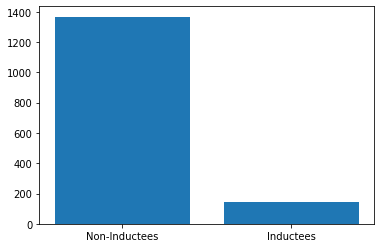

In [21]:
# import numpy as np
# import pandas as pd
# from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = [len(pre_2000[pre_2000['Inductee']==0]), len(pre_2000[pre_2000['Inductee']==1])]
plt.bar(['Non-Inductees','Inductees'], data)
plt.show()

### Extraction of X, excluding the calculated statistics

In [22]:
num = pre_2000.shape[1]
X_nc = pre_2000[pre_2000.columns[2:num-5]]
X_nc

,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF
0,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120
1,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85
2,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30
3,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5
4,13,6175,5558,839,1588,249,49,9,390,453,222,28,95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,16,4042,3489,431,878,194,9,88,446,479,544,29,14,31
1510,16,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81
1511,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20
1512,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14


In [23]:
X_nc_features = X_nc.columns.values.tolist()
X_nc_features

['Number of Seasons',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'HBP',
 'SH',
 'SF']

In [24]:
X_nc = X_nc.values
X_nc

array([[   23, 13666, 12121, ...,    32,    21,   120],
       [   18, 10081,  8480, ...,    33,     7,    85],
       [   13,  4314,  4019, ...,    17,    41,    30],
       ...,
       [   11,  4361,  3940, ...,    24,     2,    20],
       [   12,  3523,  3218, ...,    13,    36,    14],
       [   13,  5737,  5144, ...,    12,     7,    41]])

### X and y `from_2000` data

In [25]:
num = from_2000.shape[1]
X_2000 = from_2000[from_2000.columns[2:num-1]]
X_2000_features = X_2000.columns.values.tolist()
X_2000 = X_2000.values

In [26]:
y_2000 = pre_2000[['Inductee']]
y_2000_label_name = y_2000.columns.values.tolist()
y_2000 = pre_2000[y_label_name[0]].values
y_2000

array([1, 0, 0, ..., 0, 0, 0])

In [27]:
len(X_2000[0])

18

#### And X_nc and y `from_2000` data

In [28]:
num = from_2000.shape[1]
X_nc_2000 = from_2000[from_2000.columns[2:num-5]]
X_nc_2000_features = X_nc_2000.columns.values.tolist()
X_nc_2000 = X_nc_2000.values

In [29]:
len(X_nc_2000[0])

14

## Taking Steps Toward a Model

`pre_2000` (We are reserving `from_2000`, with its 305 records, for independent testing.)

It also has 21 columns, the first two (`ID` and `Player`) are for identification purposes and last column (`Inductee`) is our label. This leaves 18 feature columns for consideration. Also, note that four of the columns (the calculated statistics) are based on other features in the data.

This multi-dimensionality might need to be reduced in order to avoid overfitting. 

REFERENCE: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py


"This example shows the use of a forest of trees to evaluate the importance of features on an artificial classification task. The blue bars are the feature importances of the forest, along with their inter-trees variability represented by the error bars."

Our approach uses a forest of trees to evaluate the importance of features, where the blue bars are the feature importances of the forest and the black lines show variability.

First, we'll split the `pre_2000` data.

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_log = sc.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size = 0.2, random_state = 42)

#####  Logistic first...  ?? SHOULD I EVEN BOTHER WITH THIS???

In [32]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

LogReg = LogisticRegression(solver = 'newton-cg')
LogReg.fit(X_train, y_train)

y_train_predict = LogReg.predict(X_train)
y_test_predict = LogReg.predict(X_test)


# Count percentage of correct predictions
print("The performance of the model:")
print("------------------------------")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print('Confusion matrix for training set')
print(confusion_matrix(y_train,y_train_predict))

print('Confusion matrix for test set')
print(confusion_matrix(y_test, y_test_predict),'\n')

# Accuracy Score
from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train,y_train_predict))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test,y_test_predict))

# Precision score
from sklearn.metrics import precision_score
print('Precision of the model for training set: %.3f' % precision_score(y_train,y_train_predict))
print('Precision of the model for test set: %.3f\n' % precision_score(y_test,y_test_predict))

# Recall score
from sklearn.metrics import recall_score
print('Recall of the model for training set: %.3f' % recall_score(y_train,y_train_predict))
print('Recall of the model for test set: %.3f\n' % recall_score(y_test,y_test_predict))

# F1 Score
from sklearn.metrics import f1_score
print('F1-measure of the model for training set: %.3f' % f1_score(y_train,y_train_predict))
print('F1-measure of the model for test set: %.3f\n' % f1_score(y_test,y_test_predict))

# AUC score
from sklearn.metrics import roc_auc_score
print('AUC score of the model for training set: %.3f' % roc_auc_score(y_train,y_train_predict))
print('AUC score of the model for test set: %.3f\n' % roc_auc_score(y_test,y_test_predict))
      
# Log loss
print('Log loss of the model for training set: %.3f' % log_loss(y_train,y_train_predict))
print('Log loss of the model for test set: %.3f\n' % log_loss(y_test,y_test_predict))

The performance of the model:
------------------------------
Confusion matrix for training set
[[1071   20]
 [  61   59]]
Confusion matrix for test set
[[269   7]
 [  9  18]] 

Accuracy of the model for training set: 0.933
Accuracy of the model for test set: 0.947

Precision of the model for training set: 0.747
Precision of the model for test set: 0.720

Recall of the model for training set: 0.492
Recall of the model for test set: 0.667

F1-measure of the model for training set: 0.593
F1-measure of the model for test set: 0.692

AUC score of the model for training set: 0.737
AUC score of the model for test set: 0.821

Log loss of the model for training set: 2.310
Log loss of the model for test set: 1.824



NameError: name 'M1_clf' is not defined

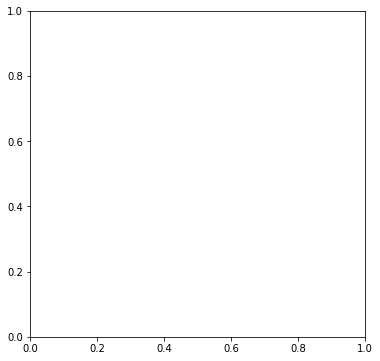

In [33]:


import matplotlib.pyplot as plt


import numpy as np

from sklearn.model_selection import learning_curve


_, axes = plt.subplots(1, figsize=(6, 6))


train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        M1_clf,
        X,
        y,
        cv=cv,
        n_jobs=4,
        train_sizes=np.linspace(0.1, 1.0, 5),
        return_times=True,
    )
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot n_samples vs fit_times
axes.grid()
axes.plot(train_sizes, fit_times_mean, "o-")
axes.fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,
)
axes.set_xlabel("Training examples")
axes.set_ylabel("fit_times")
axes.set_title("Scalability of the model")

plt.show()

NameError: name 'M1_clf' is not defined

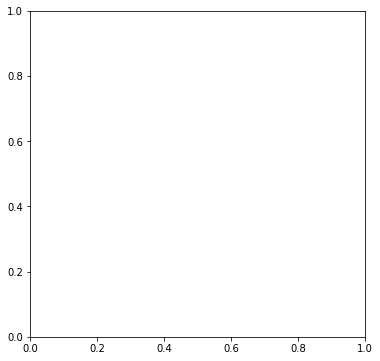

In [34]:
import numpy as np


_, axes = plt.subplots(1, figsize=(6, 6))


train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        M1_clf,
        X,
        y,
        cv=cv,
        n_jobs=4,
        train_sizes=np.linspace(0.1, 1.0, 5),
        return_times=True,
    )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot fit_time vs score
fit_time_argsort = fit_times_mean.argsort()
fit_time_sorted = fit_times_mean[fit_time_argsort]
test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
test_scores_std_sorted = test_scores_std[fit_time_argsort]
axes.grid()
axes.plot(fit_time_sorted, test_scores_mean_sorted, "o-")
axes.fill_between(
    fit_time_sorted,
    test_scores_mean_sorted - test_scores_std_sorted,
    test_scores_mean_sorted + test_scores_std_sorted,
    alpha=0.1,
)
axes.set_xlabel("fit_times")
axes.set_ylabel("Score")
axes.set_title("Performance of the model")

plt.show()





In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

std_clf_logreg = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(solver = 'newton-cg'))
std_clf_logreg.fit(X_train, y_train)
pred_test_std_logreg = std_clf_logreg.predict(X_test)

In [ ]:
# Extract PCA from pipeline
pca_std_logreg = std_clf_logreg.named_steps["pca"]


# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf_logreg.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std_logreg.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))

target_classes = range(0, 2)
colors = ("blue", "red",)
markers = ("^", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax2.set_title("Standardized training dataset after PCA")
ax2.set_xlabel("1st principal component")
ax2.set_ylabel("2nd principal component")
ax2.legend(loc="upper right")
ax2.grid()

plt.tight_layout()

plt.show()

In [ ]:
y_logreg_tester = std_clf_logreg.predict(X_2000)
print_hall_of_fame_predictions(y_logreg_tester)

SVC

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size = 0.2, random_state = 42)

std_clf_svc = make_pipeline(StandardScaler(), PCA(n_components=2), svm.SVC())
std_clf_svc.fit(X_train, y_train)
pred_test_std_svc = std_clf_svc.predict(X_test)


Prediction accuracy for the standardized test dataset with PCA
92.74%



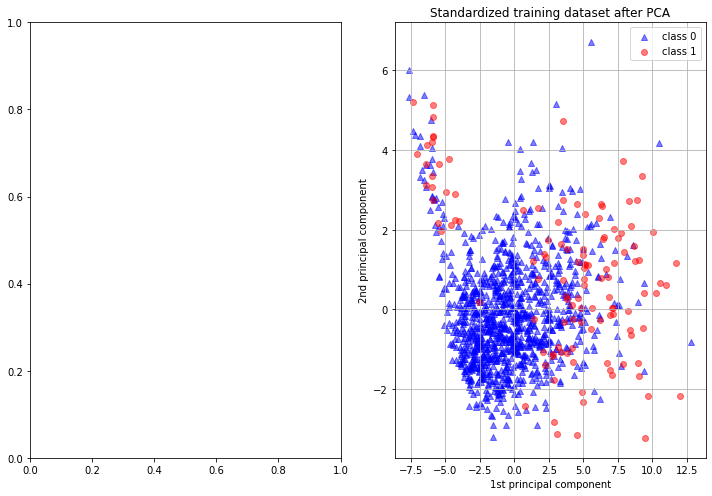

In [51]:
print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std_svc):.2%}\n")

pca_std_svc = std_clf_svc.named_steps["pca"]

scaler_svc = std_clf_svc.named_steps["standardscaler"]
scaled_X_train = scaler_svc.transform(X_train)
X_train_std_transformed = pca_std_svc.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))

target_classes = range(0, 2)
colors = ("blue", "red",)
markers = ("^", "o")

for target_class, color, marker in zip(target_classes, colors, markers):


    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax2.set_title("Standardized training dataset after PCA")

ax2.set_xlabel("1st principal component")
ax2.set_ylabel("2nd principal component")
ax2.legend(loc="upper right")
ax2.grid()

plt.tight_layout()

plt.show()

In [52]:
y_svc_tester = std_clf_svc.predict(X_2000)
print_hall_of_fame_predictions(y_svc_tester)

Miguel Cabrera
Albert Pujols


/usr/local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


#####  SVC next...

In [53]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [54]:
y_predicted_train = clf.predict(X_train)
y_predicted_test = clf.predict(X_test)

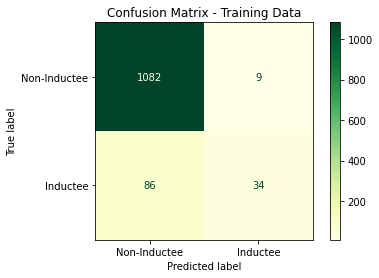

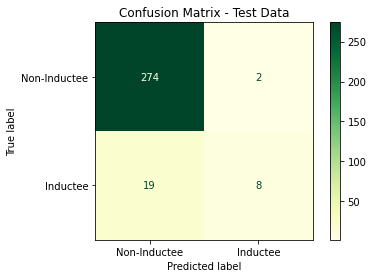

Accuracy of the model for training set: 0.922
Accuracy of the model for test set: 0.931

Precision of the model for training set: 0.791
Precision of the model for test set: 0.800

Recall of the model for training set: 0.283
Recall of the model for test set: 0.296

F1-Score of the model for training set: 0.417
F1-Score of the model for test set: 0.432



In [55]:
# Confusion Matrices

# training
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train,
    y_train,
    display_labels=['Non-Inductee',  'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Training Data")

plt.show()

# test
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=['Non-Inductee',  'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Test Data")

plt.show()

# Accuracy Score
from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train,y_predicted_train))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test,y_predicted_test))

# Precision score
from sklearn.metrics import precision_score
print('Precision of the model for training set: %.3f' % precision_score(y_train,y_predicted_train))
print('Precision of the model for test set: %.3f\n' % precision_score(y_test,y_predicted_test))

# Recall score
from sklearn.metrics import recall_score
print('Recall of the model for training set: %.3f' % recall_score(y_train,y_predicted_train))
print('Recall of the model for test set: %.3f\n' % recall_score(y_test,y_predicted_test))

# F1 Score
from sklearn.metrics import f1_score
print('F1-Score of the model for training set: %.3f' % f1_score(y_train,y_predicted_train))
print('F1-Score of the model for test set: %.3f\n' % f1_score(y_test,y_predicted_test))
      

At a quick glance, these metrics look good. The variance between the two sets of data is low but there is a problem.

*Recall* - the percentage of correctly identified values - is quite low, which causes the F1-Score to be low as well.

This begins to point to the challenge and among the bigger problems with this Hall of Fame approach. There are far more non-inductees than inductees in the Major League Baseball Hall of Fame. So, it is easy for the accuracy to be high because most people are not (and never will be) inductees to the Hall of Fame which means that accuracy on its own is a misleading metric.

## Feature Selection

Let's try to improve the Recall results by reducing features in our model.

First, we'll create a Random Forest Classifier to help determine feature importance.

In [56]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Next, we glean the importances from the forest classifier, first using a "Mean Decrease in Impurity" (or MDI) approach.

In [57]:
import numpy as np

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

Finally, we can examine feature importances visually.

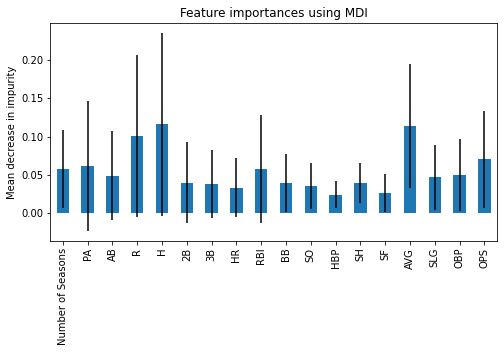

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


forest_importances = pd.Series(importances, index=X_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.set_figwidth(8)
fig.set_figheight(4)

Let's look at importances in another way, using a "Permutation" approach.

In [59]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_features)

And then visualizing the results:

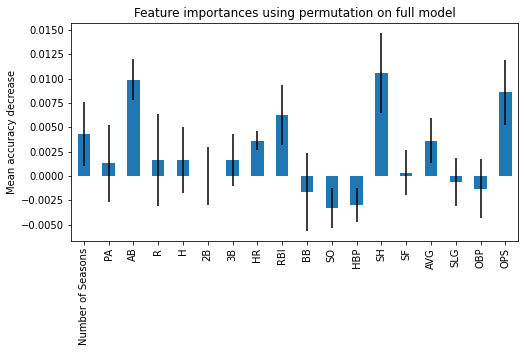

In [60]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")

fig.set_figwidth(8)
fig.set_figheight(4)

plt.show()


There are some interesting discrepencies, so let's remove the calculated statistics and see what the impact is.

In [61]:
X_nc_train, X_nc_test, y_train, y_test = train_test_split(X_nc, y, test_size = 0.2, random_state = 42)

In [62]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_nc_train, y_train)

RandomForestClassifier(random_state=0)

In [63]:
nc_importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

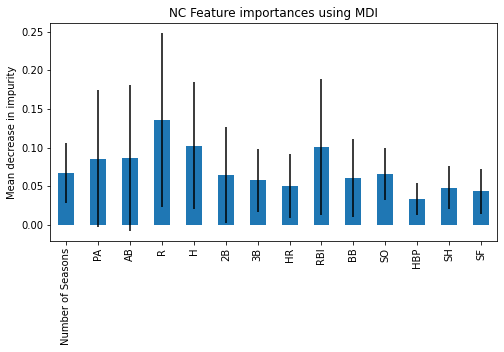

In [64]:
forest_nc_importances = pd.Series(nc_importances, index=X_nc_features)

fig, ax = plt.subplots()
forest_nc_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("NC Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.set_figwidth(8)
fig.set_figheight(4)

plt.show()

In [65]:
nc_result = permutation_importance(
    forest, X_nc_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_nc_importances = pd.Series(nc_result.importances_mean, index=X_nc_features)

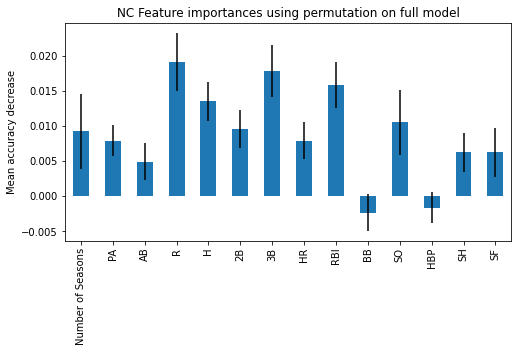

In [66]:
fig, ax = plt.subplots()
forest_nc_importances.plot.bar(yerr=nc_result.importances_std, ax=ax)
ax.set_title("NC Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")

fig.set_figwidth(8)
fig.set_figheight(4)

plt.show()

### trying things with averages

In [67]:
#X_0_features = ['H', 'AVG', 'R', 'OPS', 'PA']   # test recall =  0.259
#X_0_features = ['SH', 'AB', 'OPS', 'RBI', 'Number of Seasons']   # test recall = 0.222
#X_0_features = ['SH', 'AB', 'OPS']   # test recall = 0.111
X_0_features = ['H', 'AVG', 'R']   # test recall = 0.296

X_0 = pre_2000[X_0_features]
X_0

,H,AVG,R
0,3703,0.305503,2128
1,2470,0.291274,1453
2,1022,0.254292,376
3,1036,0.269371,557
4,1588,0.285714,839
...,...,...,...
1509,878,0.251648,431
1510,2004,0.264624,986
1511,1049,0.266244,551
1512,758,0.235550,342


In [68]:
X_0 = X_0.values
X_0

array([[3.70300000e+03, 3.05502846e-01, 2.12800000e+03],
       [2.47000000e+03, 2.91273585e-01, 1.45300000e+03],
       [1.02200000e+03, 2.54292112e-01, 3.76000000e+02],
       ...,
       [1.04900000e+03, 2.66243655e-01, 5.51000000e+02],
       [7.58000000e+02, 2.35550031e-01, 3.42000000e+02],
       [1.47700000e+03, 2.87130638e-01, 6.81000000e+02]])

In [69]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_0_log = sc.fit_transform(X_0)

In [70]:
X_0_train, X_0_test, y_train, y_test = train_test_split(X_0_log, y, test_size=0.2, random_state=42)

In [71]:
from sklearn import svm

clf_0 = svm.SVC()
clf_0.fit(X_0_train, y_train)

SVC()

In [72]:
y_predicted_train_0 = clf_0.predict(X_0_train)
y_predicted_test_0 = clf_0.predict(X_0_test)

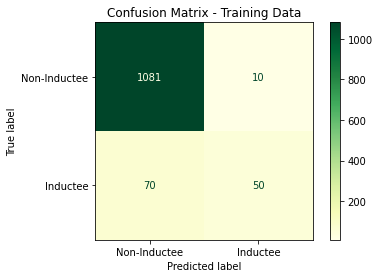

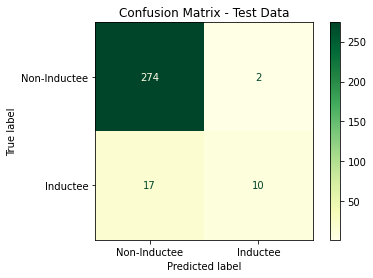

Accuracy of the model for training set: 0.934
Accuracy of the model for test set: 0.937

Precision of the model for training set: 0.833
Precision of the model for test set: 0.833

Recall of the model for training set: 0.417
Recall of the model for test set: 0.370

F1-Score of the model for training set: 0.556
F1-Score of the model for test set: 0.513



In [73]:
# Confusion Matrices

# training
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_estimator(
    clf_0,
    X_0_train,
    y_train,
    display_labels=['Non-Inductee',  'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Training Data")

plt.show()

# test
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_estimator(
    clf_0,
    X_0_test,
    y_test,
    display_labels=['Non-Inductee',  'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Test Data")

plt.show()

# Accuracy Score
from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train,y_predicted_train_0))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test,y_predicted_test_0))

# Precision score
from sklearn.metrics import precision_score
print('Precision of the model for training set: %.3f' % precision_score(y_train,y_predicted_train_0))
print('Precision of the model for test set: %.3f\n' % precision_score(y_test,y_predicted_test_0))

# Recall score
from sklearn.metrics import recall_score
print('Recall of the model for training set: %.3f' % recall_score(y_train,y_predicted_train_0))
print('Recall of the model for test set: %.3f\n' % recall_score(y_test,y_predicted_test_0))

# F1 Score
from sklearn.metrics import f1_score
print('F1-Score of the model for training set: %.3f' % f1_score(y_train,y_predicted_train_0))
print('F1-Score of the model for test set: %.3f\n' % f1_score(y_test,y_predicted_test_0))


## Redefining X

In [74]:

#X_1_features = ['R', 'H', 'RBI']  # test recall = 0.333

#X_1_features = ['R', 'H', 'RBI', 'AB']   # test recall = 0.296

#X_1_features = ['R', 'H', 'RBI', 'AB', 'PA']   # test recall = 0.296



#X_1_features = ['R', '3B', 'RBI']  # test recall = 0.370

#X_1_features = ['R', '3B', 'RBI', 'H']   # test recall = 0.296

X_1_features = ['R', '3B', 'RBI', 'H', 'SO']   # test recall = 0.556

#X_1_features = ['R', '3B', 'RBI', 'H', 'SO', '2B']   # test recall = 0.556

#X_1_features = ['R', '3B', 'RBI', 'H', 'SO', '2B', 'Number of Seasons']   # test recall = 0.556



X_1 = pre_2000[X_1_features]
X_1

,R,3B,RBI,H,SO
0,2128,96,2243,3703,1357
1,1453,59,1363,2470,1840
2,376,19,365,1022,497
3,557,47,294,1036,426
4,839,49,390,1588,222
...,...,...,...,...,...
1509,431,9,446,878,544
1510,986,23,1110,2004,1279
1511,551,21,749,1049,731
1512,342,21,348,758,662


In [75]:
X_1 = X_1.values
X_1

array([[2128,   96, 2243, 3703, 1357],
       [1453,   59, 1363, 2470, 1840],
       [ 376,   19,  365, 1022,  497],
       ...,
       [ 551,   21,  749, 1049,  731],
       [ 342,   21,  348,  758,  662],
       [ 681,   26,  792, 1477,  910]])

## Modelling on reduced X...

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html recommends going with Linear SVC, so let's try it.

In [76]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_1_log = sc.fit_transform(X_1)

In [77]:
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1_log, y, test_size=0.2, random_state=42)

In [78]:
from sklearn import svm

clf_1 = svm.SVC()
clf_1.fit(X_1_train, y_train)

SVC()

In [79]:
y_predicted_train_1 = clf_1.predict(X_1_train)
y_predicted_test_1 = clf_1.predict(X_1_test)

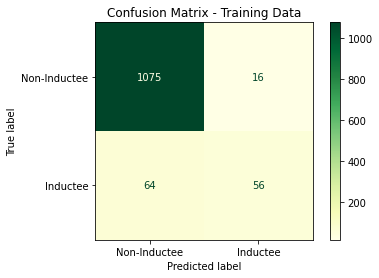

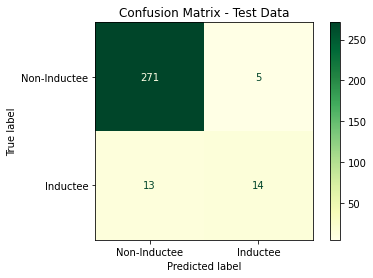

Accuracy of the model for training set: 0.934
Accuracy of the model for test set: 0.941

Precision of the model for training set: 0.778
Precision of the model for test set: 0.737

Recall of the model for training set: 0.467
Recall of the model for test set: 0.519

F1-Score of the model for training set: 0.583
F1-Score of the model for test set: 0.609



In [80]:
# Confusion Matrices

# training
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_estimator(
    clf_1,
    X_1_train,
    y_train,
    display_labels=['Non-Inductee',  'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Training Data")

plt.show()

# test
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_estimator(
    clf_1,
    X_1_test,
    y_test,
    display_labels=['Non-Inductee',  'Inductee'],
    cmap=plt.cm.YlGn
)
display.ax_.set_title("Confusion Matrix - Test Data")

plt.show()

# Accuracy Score
from sklearn.metrics import accuracy_score
print('Accuracy of the model for training set: %.3f' % accuracy_score(y_train,y_predicted_train_1))
print('Accuracy of the model for test set: %.3f\n' % accuracy_score(y_test,y_predicted_test_1))

# Precision score
from sklearn.metrics import precision_score
print('Precision of the model for training set: %.3f' % precision_score(y_train,y_predicted_train_1))
print('Precision of the model for test set: %.3f\n' % precision_score(y_test,y_predicted_test_1))

# Recall score
from sklearn.metrics import recall_score
print('Recall of the model for training set: %.3f' % recall_score(y_train,y_predicted_train_1))
print('Recall of the model for test set: %.3f\n' % recall_score(y_test,y_predicted_test_1))

# F1 Score
from sklearn.metrics import f1_score
print('F1-Score of the model for training set: %.3f' % f1_score(y_train,y_predicted_train_1))
print('F1-Score of the model for test set: %.3f\n' % f1_score(y_test,y_predicted_test_1))


In [81]:

clf_1_1 = svm.SVC()



clf_1_1.fit(X_1_train, y_train)

y_predicted_train_1_1 = clf_1_1.predict(X_1_train)
y_predicted_test_1_1 = clf_1_1.predict(X_1_test)
#print('For kernel {} the f1 score is: {}'.format('rbf', f1_score(y_test, y_predicted_test_1)))

# Recall score
from sklearn.metrics import recall_score
print('Recall of the model for training set: %.3f' % recall_score(y_train,y_predicted_train_1_1))
print('Recall of the model for test set: %.3f\n' % recall_score(y_test,y_predicted_test_1_1))

Recall of the model for training set: 0.467
Recall of the model for test set: 0.519



## Look at Reserved TEST data (actual predictions)

There are no Hall of Fame inductees in the data where players have careers that start in 2000 or later.

In [82]:
from_2000[from_2000['Inductee'] == 1]

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee


Before moving on to another experiment, let's look at how our models fare with unseen data with players who are (mostly) too recent to be in the Hall of Fame.

#### Logistic Regression model

In [83]:
y_2000_log_predict = LogReg.predict(X_2000)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [84]:
y_2000_log_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
hof_preds_log = []
i = 0
for pred in y_2000_log_predict:
    if pred == 1:
        hof_preds_log.append(i)
    i += 1
    
hof_preds_log

[]

#### clf model

In [86]:
X_2000 = from_2000[X_features]
X_2000

y_2000_predict = clf.predict(X_2000.values)

In [87]:
y_2000_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [88]:
hof_preds = []
i = 0
for pred in y_2000_predict:
    if pred == 1:
        hof_preds.append(i)
    i += 1
    
hof_preds

[36, 225, 270]

In [89]:
for player in hof_preds:
    print(from_2000_names[player])

Miguel Cabrera
Albert Pujols
Ichiro Suzuki


#### clf_1 model

In [90]:
X_2000_1 = from_2000[X_1_features]
X_2000_1

y_2000_predict_1 = clf_1.predict(X_2000_1.values)

In [91]:
y_2000_predict_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [92]:
hof_preds_1 = []
i = 0
for pred in y_2000_predict_1:
    if pred == 1:
        hof_preds_1.append(i)
    i += 1
    
hof_preds_1

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [93]:
for player in hof_preds_1:
    print(from_2000_names[player])

Matt Adams
Yonder Alonso
Jose Altuve
Robert Andino
Elvis Andrus
Alex Avila
Mike Aviles
Erick Aybar
Jeff Baker
Josh Bard
Clint Barmes
Jason Bartlett
Jose Bautista
Jason Bay
Gordon Beckham
Brandon Belt
Wilson Betemit
Charlie Blackmon
Andres Blanco
Gregor Blanco
Willie Bloomquist
Emilio Bonifacio
Peter Bourjos
Michael Bourn
Milton Bradley
Michael Brantley
Ryan Braun
Jay Bruce
John Buck
Pat Burrell
Drew Butera
Billy Butler
Marlon Byrd
Eric Byrnes
Asdrubal Cabrera
Melky Cabrera
Miguel Cabrera
Lorenzo Cain
Kole Calhoun
Alberto Callaspo
Robinson Cano
Matt Carpenter
Jamey Carroll
Welington Castillo
Jason Castro
Starlin Castro
Ronny Cedeno
Francisco Cervelli
Endy Chavez
Robinson Chirinos
Shin-Soo Choo
Brandon Crawford
Carl Crawford
Joe Crede
Coco Crisp
Nelson Cruz
Michael Cuddyer
Jack Cust
Chris Davis
Rajai Davis
Alejandro De Aza
David DeJesus
Chris Denorfia
Daniel Descalso
Ian Desmond
Matt Diaz
Greg Dobbs
Josh Donaldson
Ryan Doumit
Stephen Drew
Lucas Duda
Adam Dunn
Jarrod Dyson
Adam Eaton
Davi

In [94]:
for player in from_2000_names:
    print(player)

Matt Adams
Yonder Alonso
Jose Altuve
Robert Andino
Elvis Andrus
Alex Avila
Mike Aviles
Erick Aybar
Jeff Baker
Josh Bard
Clint Barmes
Jason Bartlett
Jose Bautista
Jason Bay
Gordon Beckham
Brandon Belt
Wilson Betemit
Charlie Blackmon
Andres Blanco
Gregor Blanco
Willie Bloomquist
Emilio Bonifacio
Peter Bourjos
Michael Bourn
Milton Bradley
Michael Brantley
Ryan Braun
Jay Bruce
John Buck
Pat Burrell
Drew Butera
Billy Butler
Marlon Byrd
Eric Byrnes
Asdrubal Cabrera
Melky Cabrera
Miguel Cabrera
Lorenzo Cain
Kole Calhoun
Alberto Callaspo
Robinson Cano
Matt Carpenter
Jamey Carroll
Welington Castillo
Jason Castro
Starlin Castro
Ronny Cedeno
Francisco Cervelli
Endy Chavez
Robinson Chirinos
Shin-Soo Choo
Brandon Crawford
Carl Crawford
Joe Crede
Coco Crisp
Nelson Cruz
Michael Cuddyer
Jack Cust
Chris Davis
Rajai Davis
Alejandro De Aza
David DeJesus
Chris Denorfia
Daniel Descalso
Ian Desmond
Matt Diaz
Greg Dobbs
Josh Donaldson
Ryan Doumit
Stephen Drew
Lucas Duda
Adam Dunn
Jarrod Dyson
Adam Eaton
Davi